In [91]:
# data analysis and wrangling

import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport

# Visualization

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots
import plotly.express as px
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
import plotly.graph_objects as go
pd.set_option('display.max_rows', None)

# machine learning

from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, roc_curve, auc, SCORERS
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.decomposition import FactorAnalysis, PCA
from lightgbm.sklearn import LGBMClassifier

import sklearn.model_selection as skselect
import sklearn.datasets as skdata
import sklearn.metrics as metrics
import scikitplot as skplt
sns.set()

import os 
import warnings
warnings.filterwarnings('ignore')

## 1 Acquire the data

### 1.1 Read  CSV

**Q:** Load the [data] in the current path and display the head: the name of the file is trainCourse.csv.

In [92]:
df = pd.read_csv("trainCourse.csv")

In [93]:
df.head()

Id  Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0  75573               1             D3              26        0.487179   
1    414               1             D3              26        0.487179   
2  36755               1             D4              26        1.000000   
3  71747               1             D2              26        0.897436   
4  14523               1             E1              26        0.282051   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  ...  \
0               2               1               1  0.253731  0.763636  ...   
1               2               3               1  0.194030  0.763636  ...   
2               2               1               1  0.268657  0.690909  ...   
3               2               3               1  0.537313  0.781818  ...   
4               2               1               1  0.432836  0.818182  ...   

   Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0                   0                   0                   0   
1                   1                   0                   0   
2                   0                   0                   0   
3                   1                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         0  
1                   0                   0                   0         1  
2                   0                   0                   0         0  
3                   0                   0                   0         1  
4                   0                   0                   0         1  

[5 rows x 128 columns]

**Q:** How many samples and features that we have in the dataset

In [94]:
df.shape

(5938, 128)

### 1.2 Describing data


**Q:** Print the global information about the data and the different feature types 

In [95]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5938 entries, 0 to 5937
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 5.8+ MB


**Q:** Which features are categorical?

In [96]:
df.select_dtypes(include='object')

Product_Info_2
0                D3
1                D3
2                D4
3                D2
4                E1
5                D3
6                D2
7                D4
8                D4
9                D4
10               D2
11               D4
12               D4
13               A6
14               D4
15               A5
16               A2
17               D3
18               D3
19               D4
20               D3
21               C2
22               A2
23               D3
24               D2
25               A2
26               D1
27               A8
28               D3
29               D1
30               D2
31               D3
32               D3
33               D3
34               A8
35               D3
36               D4
37               D4
38               D3
39               D2
40               A7
41               D1
42               A2
43               D3
44               D2
45               D3
46               A2
47               E1
48               A1
49               D1
50               D4
51               D3
52               A8
53               B1
54               A3
55               D4
56               D1
57               A1
58               A8
59               D1
60               A6
61               D1
62               A6
63               D1
64               C2
65               E1
66               D4
67               D1
68               A1
69               D3
70               A2
71               D3
72               D1
73               D1
74               D1
75               D2
76               D2
77               A8
78               C1
79               D3
80               A8
81               A1
82               D4
83               D2
84               D3
85               E1
86               A8
87               D1
88               D2
89               D2
90               D2
91               D3
92               D1
93               D4
94               A2
95               E1
96               B2
97               D1
98               D4
99               D1
100              A6
101              A8
102              D1
103              A6
104              B2
105              A8
106              D3
107              A6
108              D4
109              D3
110              A8
111              A8
112              D1
113              D4
114              D2
115              A2
116              E1
117              A6
118              D3
119              D3
120              E1
121              E1
122              D3
123              A8
124              D4
125              A8
126              D3
127              D3
128              D4
129              D3
130              A6
131              D1
132              B2
133              D4
134              D3
135              D2
136              D4
137              B2
138              D4
139              D3
140              D3
141              A3
142              D2
143              D4
144              C3
145              A2
146              E1
147              D1
148              A8
149              D2
150              D2
151              D2
152              A3
153              A1
154              D4
155              D4
156              C2
157              D4
158              D3
159              A6
160              D4
161              E1
162              A8
163              E1
164              D3
165              D4
166              D2
167              D2
168              A2
169              D2
170              D3
171              D2
172              A7
173              D4
174              D1
175              D1
176              D3
177              A8
178              A8
179              D3
180              D4
181              D3
182              D3
183              A8
184              D4
185              D2
186              A1
187              D4
188              A8
189              A7
190              A8
191              D3
192              D2
193              A2
194              A8
195              D3
196              A5
197              D4
198              A8
199  

**Q:** The Id Variable is it a variable that you can use in machine learning? Print the number of unique value of Id

In [97]:
len(df['Id'].unique())

5938

5938 instances and all of them are unique so we can drop this variable and for that we will use the **drop** function from Pandas

In [98]:
df = df.drop(['Id'], axis=1)
df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
0               1             D3              26        0.487179   
1               1             D3              26        0.487179   
2               1             D4              26        1.000000   
3               1             D2              26        0.897436   
4               1             E1              26        0.282051   

   Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
0               2               1               1  0.253731  0.763636   
1               2               3               1  0.194030  0.763636   
2               2               1               1  0.268657  0.690909   
3               2               3               1  0.537313  0.781818   
4               2               1               1  0.432836  0.818182   

         Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
0  0.267782  ...                   0                   0                   0   
1  0.278243  ...                   1                   0                   0   
2  0.282427  ...                   0                   0                   0   
3  0.320084  ...                   1                   0                   0   
4  0.351464  ...                   0                   0                   0   

   Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
0                   0                   0                   0         0  
1                   0                   0                   0         1  
2                   0                   0                   0         0  
3                   0                   0                   0         1  
4                   0                   0                   0         1  

[5 rows x 127 columns]

### 1.3 Exploration

Q: **What is the distribution of numerical feature values across the samples?

In [99]:
df.describe()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
count     5938.000000     5938.000000     5938.000000     5938.000000   
mean         1.026271       24.534187        0.331447        2.006399   
std          0.159955        4.900897        0.283566        0.079747   
min          1.000000        4.000000        0.000000        2.000000   
25%          1.000000       26.000000        0.076923        2.000000   
50%          1.000000       26.000000        0.230769        2.000000   
75%          1.000000       26.000000        0.487179        2.000000   
max          2.000000       37.000000        1.000000        3.000000   

       Product_Info_6  Product_Info_7      Ins_Age           Ht           Wt  \
count     5938.000000     5938.000000  5938.000000  5938.000000  5938.000000   
mean         2.684742        1.046817     0.406994     0.707906     0.295191   
std          0.728847        0.302420     0.197635     0.074145     0.089481   
min          1.000000        1.000000     0.000000     0.400000     0.069038   
25%          3.000000        1.000000     0.238806     0.654545     0.232218   
50%          3.000000        1.000000     0.402985     0.709091     0.288703   
75%          3.000000        1.000000     0.567164     0.763636     0.351464   
max          3.000000        3.000000     0.925373     0.963636     1.000000   

               BMI  ...  Medical_Keyword_40  Medical_Keyword_41  \
count  5938.000000  ...         5938.000000         5938.000000   
mean      0.473208  ...            0.061637            0.011283   
std       0.121807  ...            0.240515            0.105631   
min       0.058838  ...            0.000000            0.000000   
25%       0.390578  ...            0.000000            0.000000   
50%       0.457590  ...            0.000000            0.000000   
75%       0.534355  ...            0.000000            0.000000   
max       1.000000  ...            1.000000            1.000000   

       Medical_Keyword_42  Medical_Keyword_43  Medical_Keyword_44  \
count         5938.000000         5938.000000         5938.000000   
mean             0.046817            0.010273            0.007915   
std              0.211265            0.100841            0.088622   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_45  Medical_Keyword_46  Medical_Keyword_47  \
count         5938.000000         5938.000000         5938.000000   
mean             0.013304            0.008926            0.016335   
std              0.114583            0.094061            0.126773   
min              0.000000            0.000000            0.000000   
25%              0.000000            0.000000            0.000000   
50%              0.000000            0.000000            0.000000   
75%              0.000000            0.000000            0.000000   
max              1.000000            1.000000            1.000000   

       Medical_Keyword_48     Response  
count         5938.000000  5938.000000  
mean             0.053722     0.747727  
std              0.225487     0.434354  
min              0.000000     0.000000  
25%              0.000000     0.000000  
50%              0.000000     1.000000  
75%              0.000000     1.000000  
max              1.000000     1.000000  

[8 rows x 126 columns]

Q: are there missing values in the data? How many? give the ration for each feature

In [100]:
a = df.isnull().sum()[df.isnull().sum()!=0]
b = np.round(a/df.shape[0]*100,2)
c = pd.concat([a,b],axis=1).sort_values(by=0, ascending=True)
c.columns = ['NB_nulle','Prc %']
c

NB_nulle  Prc %
Employment_Info_4         687  11.57
Medical_History_1         885  14.90
Employment_Info_6        1078  18.15
Family_Hist_4            1902  32.03
Insurance_History_5      2552  42.98
Family_Hist_2            2911  49.02
Family_Hist_3            3410  57.43
Family_Hist_5            4197  70.68
Medical_History_15       4423  74.49
Medical_History_24       5553  93.52
Medical_History_32       5816  97.95
Medical_History_10       5876  98.96

Q: Now let's look at the variable that we are interested in predicting ** the Y variable ** which is response. Using the count function, display the class imbalance

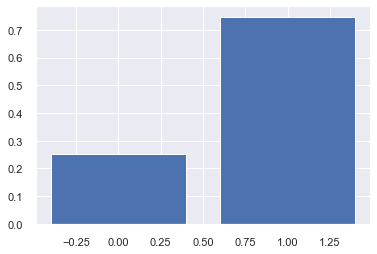

1    0.747727
0    0.252273
Name: Response, dtype: float64


In [101]:
counts_y = df['Response'].value_counts()/df.shape[0]
plt.bar(counts_y.index, counts_y.values)
#plt.xticks(label)
plt.show()
print(counts_y)

##  2 Exploratory Data Analysis

We arrive at following assumptions based on data analysis done so far. We may validate these assumptions further before taking appropriate actions.

* **Correlating.**: We want to know how well does each feature correlate with Survival. 
* **Completing.** : We want to complete missing values
* **Correcting.**: We want de drop some features
* **Creating.**: We want to creat new features


**Q:** Draw a big picture of the data using ProfileReport

In [102]:
df_profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [103]:
#df_profile.to_widgets()

In [13]:
profile.to_file()

TypeError: to_file() missing 1 required positional argument: 'output_file'

## 3 Preparing the data

### 3.1 Data encoding

Our categorical variable Product_Info_2:

**Q:** Print the different modality of this variable

In [104]:
df['Product_Info_2'].unique()

array(['D3', 'D4', 'D2', 'E1', 'A6', 'A5', 'A2', 'C2', 'D1', 'A8', 'A7',
       'A1', 'B1', 'A3', 'C1', 'B2', 'C3', 'C4', 'A4'], dtype=object)

**Q:** Use any method for encoding the labels of Product_Info_2 feature:

In [105]:
OneHotEncoding = OneHotEncoder(handle_unknown="ignore")    
OneHotEncoding.fit(df[['Product_Info_2']])                                
a = OneHotEncoding.transform(df[['Product_Info_2']])                     
other = pd.DataFrame(data=a.toarray()).astype(int)  
other.head()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18
0  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   1   0   0
1  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   1   0   0
2  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   0
3  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   1   0   0   0
4  0  0  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1

We now have 19 columns labeled 0 through 18 which we are going to quickly rename using a for loop function.

Q: Use a list to rename the columns of X_train_dum, and X_test_dum as 'Product_Info_2_' + 'modality'

In [106]:
other.columns = ['Product_Info_2_'+str(i) for i in df['Product_Info_2'].unique()]
other.head()

Product_Info_2_D3  Product_Info_2_D4  Product_Info_2_D2  Product_Info_2_E1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Product_Info_2_A6  Product_Info_2_A5  Product_Info_2_A2  Product_Info_2_C2  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Product_Info_2_D1  Product_Info_2_A8  Product_Info_2_A7  Product_Info_2_A1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Product_Info_2_B1  Product_Info_2_A3  Product_Info_2_C1  Product_Info_2_B2  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_A4  
0                  1                  0                  0  
1                  1                  0                  0  
2                  0                  1                  0  
3                  0                  0                  0  
4                  0                  0                  1

Add the new columns to the orginal data and remove the categorical variable using pandas join function

In [107]:
df = df.join(other,lsuffix='_caller', rsuffix='_other')
df = df.drop(['Product_Info_2'], axis=1)
df.head()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0               1              26        0.487179               2   
1               1              26        0.487179               2   
2               1              26        1.000000               2   
3               1              26        0.897436               2   
4               1              26        0.282051               2   

   Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
0               1               1  0.253731  0.763636  0.267782  0.378752   
1               3               1  0.194030  0.763636  0.278243  0.395231   
2               1               1  0.268657  0.690909  0.282427  0.473555   
3               3               1  0.537313  0.781818  0.320084  0.443418   
4               1               1  0.432836  0.818182  0.351464  0.455603   

   ...  Product_Info_2_A8  Product_Info_2_A7  Product_Info_2_A1  \
0  ...                  0                  0                  0   
1  ...                  0                  0                  0   
2  ...                  0                  0                  0   
3  ...                  0                  0                  0   
4  ...                  0                  0                  0   

   Product_Info_2_B1  Product_Info_2_A3  Product_Info_2_C1  Product_Info_2_B2  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_A4  
0                  1                  0                  0  
1                  1                  0                  0  
2                  0                  1                  0  
3                  0                  0                  0  
4                  0                  0                  1  

[5 rows x 145 columns]

### 3.2 Data imputaion

 Check if there are any missing values

In [108]:
a = df.isnull().sum()[df.isnull().sum()!=0]
b = np.round(a/df.shape[0]*100,2)
c = pd.concat([a,b],axis=1).sort_values(by=0, ascending=True)
c.columns = ['NB_nulle','Prc %']
c

NB_nulle  Prc %
Employment_Info_4         687  11.57
Medical_History_1         885  14.90
Employment_Info_6        1078  18.15
Family_Hist_4            1902  32.03
Insurance_History_5      2552  42.98
Family_Hist_2            2911  49.02
Family_Hist_3            3410  57.43
Family_Hist_5            4197  70.68
Medical_History_15       4423  74.49
Medical_History_24       5553  93.52
Medical_History_32       5816  97.95
Medical_History_10       5876  98.96

Impute your values using model prediction :

 La variable Employment_Info_4 : 

0       0.000000
1            NaN
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6            NaN
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.125000
22      0.000000
23      0.000000
24           NaN
25      0.000000
26           NaN
27      0.000000
28      0.000000
29      0.000000
30           NaN
31           NaN
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.028000
40      0.000000
41           NaN
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.028559
48      0.000000
49      0.000200
50      0.000000
51      0.047000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

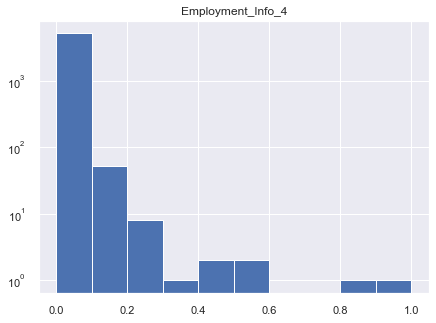

In [109]:
col = c.index[0]
y_train = df[col][df[col].notnull()]
y_test = df[col][df[col].isnull()]

print(df[col])
print(y_train)
print(y_test)

plt.figure(1, figsize=(7,5))
plt.hist(y_train)
plt.title(str(col))
plt.yscale('log')

In [110]:
n_clusters = 8
y_train_array = np.array(y_train).reshape(-1, 1)
k_means = KMeans(init='k-means++', n_clusters=n_clusters)
y_train_mod = k_means.fit_predict(y_train_array)
set(y_train_mod)

{0, 1, 2, 3, 4, 5, 6, 7}

In [111]:
cor_x = df.corr()[col].drop([col],axis=0)

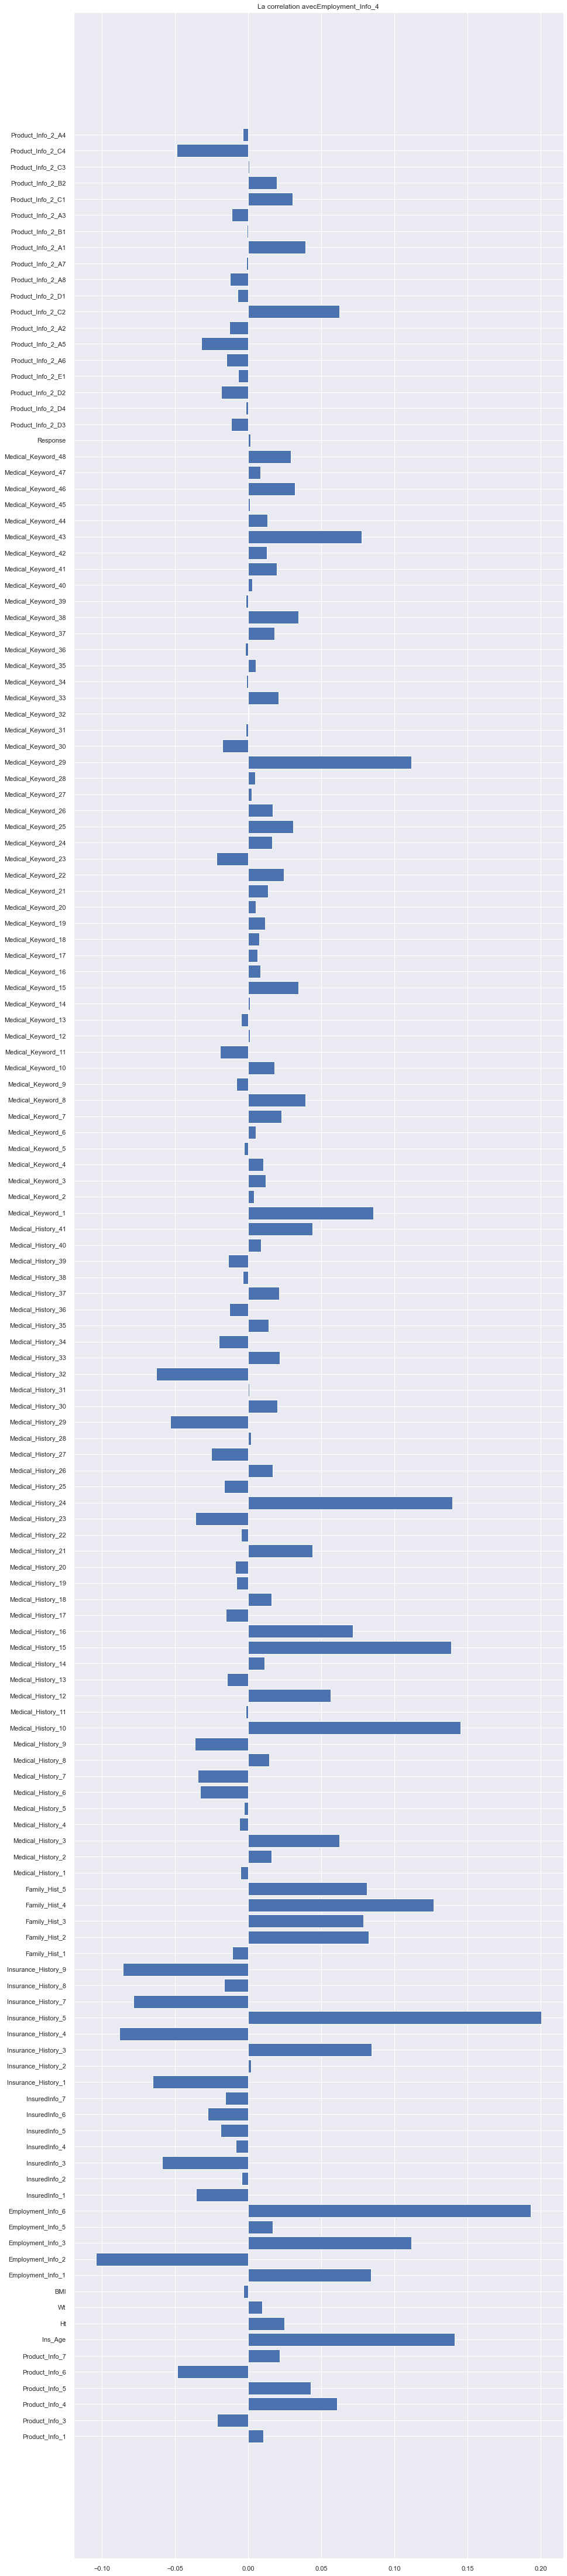

In [112]:
x = cor_x.index
plt.figure(2,figsize=(15,80))
plt.barh(x, cor_x)
plt.title("La correlation avec"+str(col))
plt.show()

In [113]:
set1 = set(cor_x[abs(cor_x)>0.1].index)
set2 = set(c.index)
cols = set1.difference(set2)
print(set1,"\n")
print(cols,"\n\n")
x_train = df.loc[y_train.index, cols]
x_test = df.loc[y_test.index, cols]
print(x_train)
print(y_train_mod)
print(x_test)

{'Employment_Info_6', 'Medical_History_10', 'Medical_History_15', 'Medical_History_24', 'Medical_Keyword_29', 'Insurance_History_5', 'Employment_Info_2', 'Ins_Age', 'Employment_Info_3', 'Family_Hist_4'} 

{'Ins_Age', 'Employment_Info_2', 'Medical_Keyword_29', 'Employment_Info_3'} 


       Ins_Age  Employment_Info_2  Medical_Keyword_29  Employment_Info_3
0     0.253731                  9                   0                  1
2     0.268657                  9                   0                  1
3     0.537313                  9                   0                  1
4     0.432836                 14                   0                  1
5     0.402985                  9                   0                  1
7     0.179104                  9                   0                  1
8     0.537313                  9                   0                  1
9     0.358209                  9                   0                  1
10    0.656716                 12                   0      

       Ins_Age  Employment_Info_2  Medical_Keyword_29  Employment_Info_3
1     0.194030                  9                   0                  1
6     0.522388                  9                   0                  1
24    0.417910                  9                   0                  1
26    0.701493                  1                   0                  3
30    0.626866                 12                   0                  1
31    0.402985                  9                   0                  1
41    0.671642                  9                   0                  1
72    0.716418                 12                   0                  1
73    0.716418                  1                   0                  3
91    0.253731                  9                   0                  1
137   0.179104                  9                   0                  1
149   0.388060                 12                   0                  1
151   0.537313                  9                  

In [114]:
model = RandomForestClassifier()
model.fit(x_train,y_train_mod)
y_predict = model.predict(x_test)
print(y_predict)
print(set(y_predict))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [115]:
m = [y_train[y_train_mod==k].mean() for k in range(n_clusters)]
m

[0.00022470130691399666,
 0.43,
 0.09003444444444442,
 0.13931578947368423,
 0.9,
 0.021181376518218623,
 0.22722222222222221,
 0.04773545138888889]

In [116]:
y_pred_moy = pd.Series(np.zeros((1)))
for i in range(len(y_predict)):
    y = y_predict[i]
    y_pred_moy[i] = m[y]
    
y_pred_moy.index = y_test.index
y_test = y_pred_moy

print(df[col])
print()
print(y_train)
print()
print(y_test)

0       0.000000
1            NaN
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6            NaN
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.125000
22      0.000000
23      0.000000
24           NaN
25      0.000000
26           NaN
27      0.000000
28      0.000000
29      0.000000
30           NaN
31           NaN
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.028000
40      0.000000
41           NaN
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.028559
48      0.000000
49      0.000200
50      0.000000
51      0.047000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

In [117]:
for i in y_test.index:
    df[col][i] = y_test[i]
df[col]

0       0.000000
1       0.000225
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000225
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.125000
22      0.000000
23      0.000000
24      0.000225
25      0.000000
26      0.000225
27      0.000000
28      0.000000
29      0.000000
30      0.000225
31      0.000225
32      0.000000
33      0.000000
34      0.000000
35      0.000000
36      0.000000
37      0.000000
38      0.000000
39      0.028000
40      0.000000
41      0.000225
42      0.000000
43      0.000000
44      0.000000
45      0.000000
46      0.000000
47      0.028559
48      0.000000
49      0.000200
50      0.000000
51      0.047000
52      0.000000
53      0.000000
54      0.000000
55      0.000000
56      0.000000
57      0.000000
58      0.0000

## Autre variable : 

In [118]:
def Missing_Values(df):
    a = df.isnull().sum()[df.isnull().sum()!=0]
    b = np.round(a/df.shape[0]*100,2)
    c = pd.concat([a,b],axis=1).sort_values(by=0, ascending=True)
    c.columns = ['NB_nulle','Prc %']
    return c

def distribution(df,col):
    y_train = df[col][df[col].notnull()]
    y_test = df[col][df[col].isnull()]
    plt.figure(1, figsize=(7,5))
    plt.hist(y_train)
    plt.title(str(col))
    plt.yscale('log')
    return y_train, y_test

def correlation(df, col, n_clusters, y_train):
    y_train_array = np.array(y_train).reshape(-1, 1)
    k_means = KMeans(init='k-means++', n_clusters=n_clusters)
    y_train_mod = k_means.fit_predict(y_train_array)

    cor_x = df.corr()[col].drop([col],axis=0)
    x = cor_x.index
    plt.figure(2,figsize=(15,80))
    plt.barh(x, cor_x) 
    plt.title("La correlation avec"+str(col))
    plt.show()
    return y_train_mod, cor_x

def Featcher(c, cor_x, pc):
    set1 = set(cor_x[abs(cor_x)>pc].index)
    set2 = set(c.index)
    cols = set1.difference(set2)
    print(set1)
    print(cols)
    return cols
    
def Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols):
    
    x_train = df.loc[y_train.index, cols]
    x_test = df.loc[y_test.index, cols]

    model = RandomForestClassifier()
    model.fit(x_train,y_train_mod)
    y_predict = model.predict(x_test)

    m = [y_train[y_train_mod==k].mean() for k in range(n_clusters)]

    y_pred_moy = pd.Series(np.zeros((1)))
    for i in range(len(y_predict)):
        y = y_predict[i]
        y_pred_moy[i] = m[y]
    
    y_pred_moy.index = y_test.index
    y_test = y_pred_moy

    for i in y_test.index:
        df[col][i] = y_test[i]
    

In [119]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Medical_History_1         885  14.90
Employment_Info_6        1078  18.15
Family_Hist_4            1902  32.03
Insurance_History_5      2552  42.98
Family_Hist_2            2911  49.02
Family_Hist_3            3410  57.43
Family_Hist_5            4197  70.68
Medical_History_15       4423  74.49
Medical_History_24       5553  93.52
Medical_History_32       5816  97.95
Medical_History_10       5876  98.96

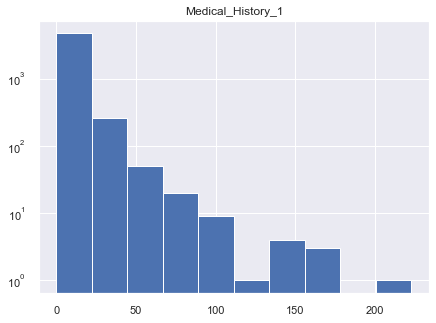

In [120]:
col = c.index[0]
y_train, y_test = distribution(df,col)

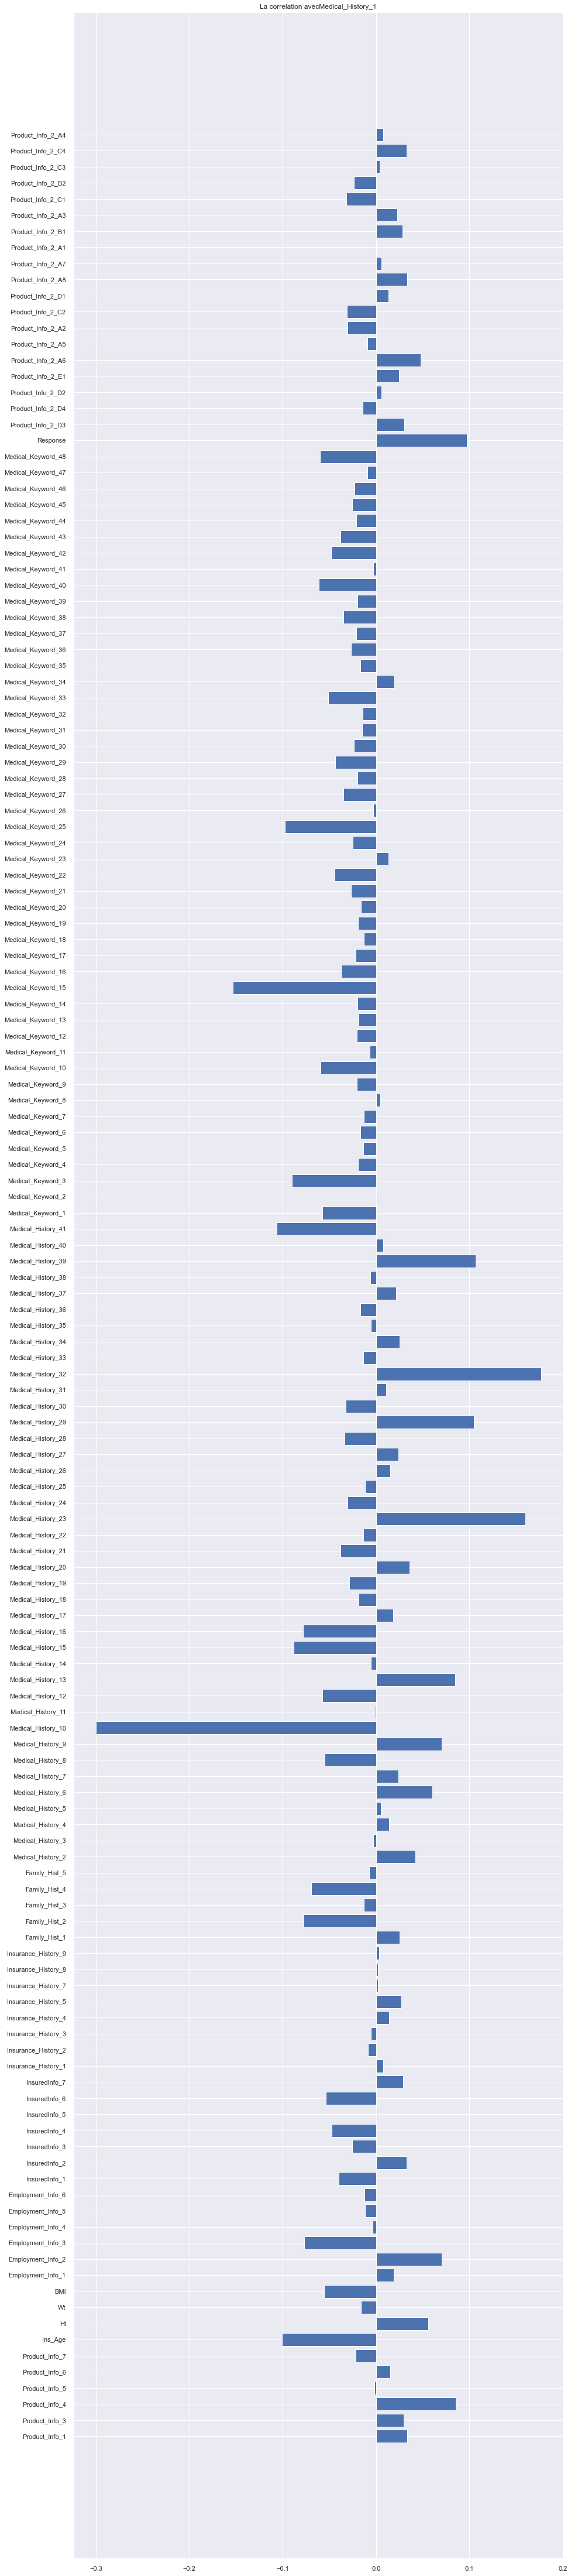

In [121]:
n_clusters = 9
y_train_mod, cor_x = correlation(df, col, n_clusters, y_train)

In [122]:
cols = Featcher(c, cor_x, 0.1)

{'Medical_History_41', 'Medical_History_29', 'Medical_History_10', 'Medical_History_23', 'Medical_History_39', 'Medical_Keyword_15', 'Ins_Age', 'Medical_History_32'}
{'Medical_History_41', 'Medical_History_29', 'Medical_History_23', 'Medical_History_39', 'Medical_Keyword_15', 'Ins_Age'}


In [123]:
Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols)
df[col]

0         6.000000
1         4.000000
2        22.000000
3        19.000000
4        11.000000
5         5.000000
6         1.000000
7         5.000000
8        19.000000
9         0.000000
10        2.000000
11        9.000000
12        2.000000
13        1.000000
14        0.000000
15        4.676489
16        1.000000
17       32.000000
18        5.000000
19        4.676489
20        6.000000
21       13.000000
22        7.000000
23        5.000000
24        0.000000
25        1.000000
26        7.000000
27        9.000000
28        1.059363
29        4.000000
30       10.000000
31        1.000000
32        3.000000
33        1.059363
34        1.059363
35        4.676489
36        0.000000
37        4.676489
38        1.000000
39        2.000000
40       16.000000
41        0.000000
42        2.000000
43        3.000000
44        2.000000
45       11.000000
46       10.000000
47        1.000000
48       11.000000
49       10.817708
50        2.000000
51        6.000000
52        1.

In [124]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Employment_Info_6        1078  18.15
Family_Hist_4            1902  32.03
Insurance_History_5      2552  42.98
Family_Hist_2            2911  49.02
Family_Hist_3            3410  57.43
Family_Hist_5            4197  70.68
Medical_History_15       4423  74.49
Medical_History_24       5553  93.52
Medical_History_32       5816  97.95
Medical_History_10       5876  98.96

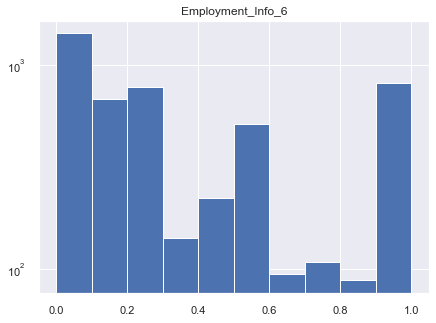

In [125]:
col = c.index[0]
y_train, y_test = distribution(df,col)

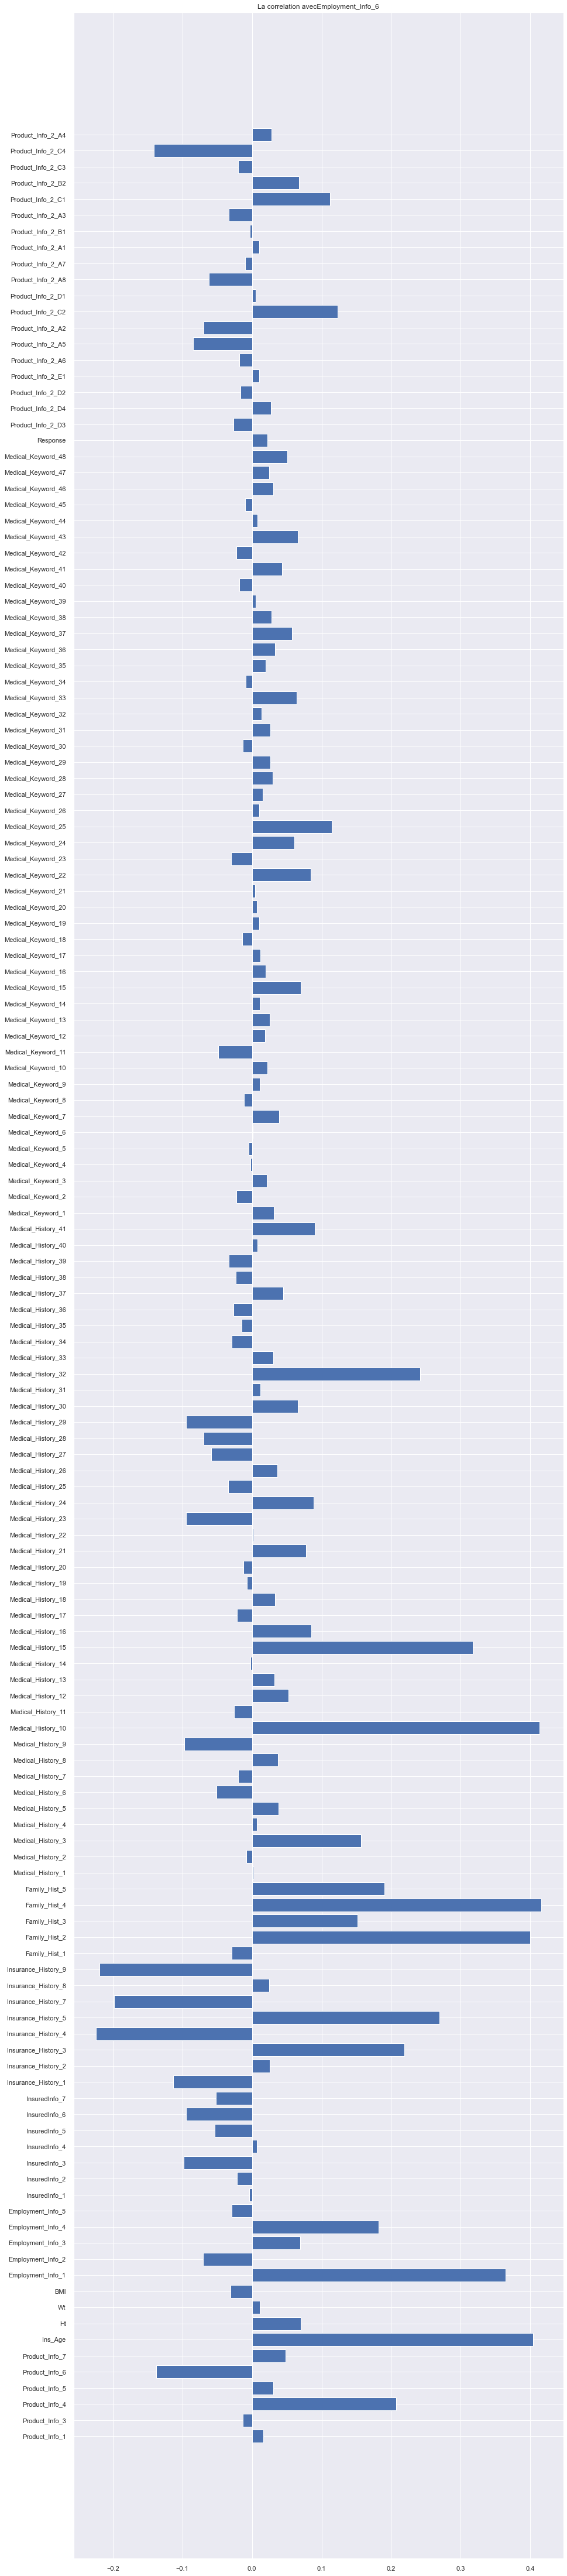

In [126]:
n_clusters = 10
y_train_mod, cor_x = correlation(df, col, n_clusters, y_train)

In [127]:
cols = Featcher(c, cor_x, 0.2)

{'Product_Info_4', 'Medical_History_10', 'Employment_Info_1', 'Family_Hist_2', 'Medical_History_15', 'Insurance_History_4', 'Insurance_History_5', 'Insurance_History_9', 'Ins_Age', 'Medical_History_32', 'Insurance_History_3', 'Family_Hist_4'}
{'Product_Info_4', 'Employment_Info_1', 'Insurance_History_9', 'Insurance_History_4', 'Ins_Age', 'Insurance_History_3'}


In [128]:
Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols)
df[col]

0       3.750000e-01
1       1.863862e-02
2       2.500000e-01
3       7.500000e-01
4       1.000000e+00
5       2.756744e-01
6       5.000000e-01
7       2.500000e-02
8       2.500000e-01
9       0.000000e+00
10      1.000000e+00
11      0.000000e+00
12      1.000000e-01
13      2.500000e-02
14      4.000000e-01
15      1.200000e-01
16      5.000000e-02
17      4.979333e-01
18      4.000000e-02
19      1.863862e-02
20      5.000000e-01
21      9.994950e-01
22      0.000000e+00
23      1.863862e-02
24      7.500000e-02
25      5.000000e-02
26      1.500000e-01
27      7.500000e-02
28      7.500000e-01
29      2.000000e-01
30      1.000000e+00
31      1.000000e-01
32      1.000000e+00
33      1.000000e+00
34      9.402554e-02
35      9.994950e-01
36      1.000000e-02
37      6.000000e-01
38      8.000000e-01
39      1.000000e+00
40      1.863862e-02
41      1.250000e-01
42      5.000000e-01
43      7.000000e-01
44      1.000000e+00
45      4.000000e-01
46      6.000000e-01
47      7.150

In [129]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Family_Hist_4            1902  32.03
Insurance_History_5      2552  42.98
Family_Hist_2            2911  49.02
Family_Hist_3            3410  57.43
Family_Hist_5            4197  70.68
Medical_History_15       4423  74.49
Medical_History_24       5553  93.52
Medical_History_32       5816  97.95
Medical_History_10       5876  98.96

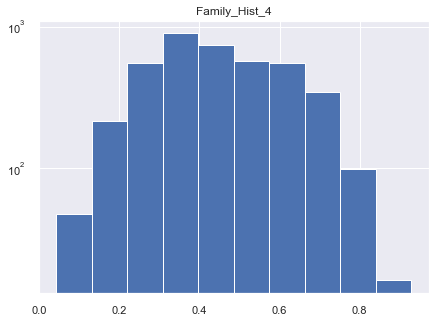

In [130]:
col = c.index[0]
y_train, y_test = distribution(df,col)

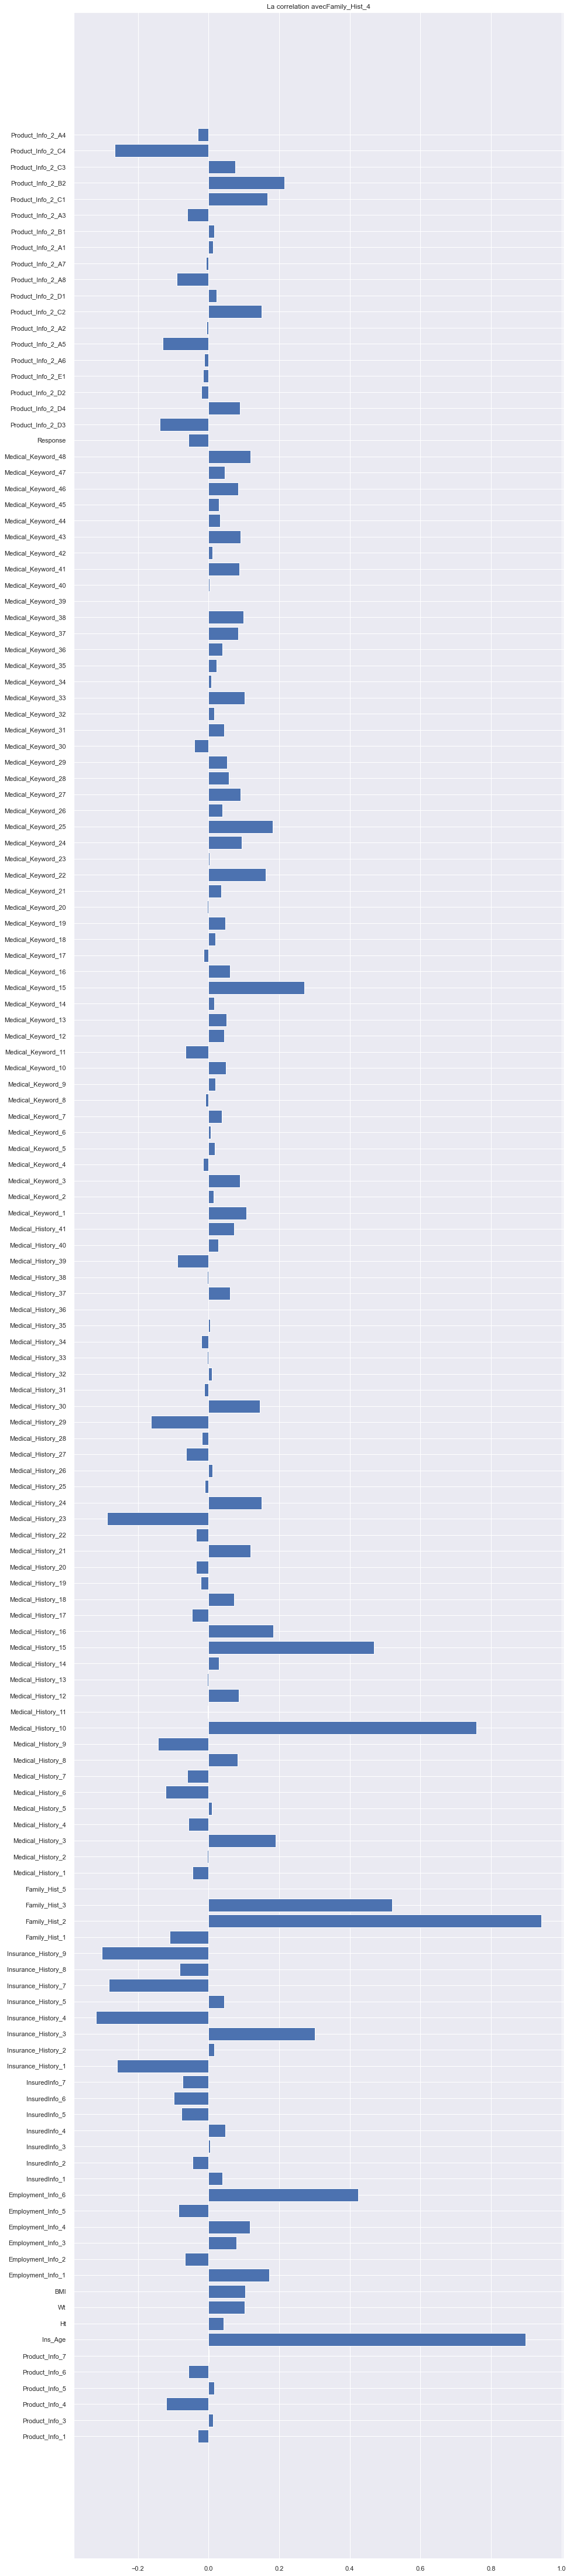

In [131]:
n_clusters = 10
y_train_mod, cor_x = correlation(df, col, n_clusters, y_train)

In [132]:
cols = Featcher(c, cor_x, 0.3)

{'Employment_Info_6', 'Medical_History_10', 'Family_Hist_2', 'Family_Hist_3', 'Medical_History_15', 'Insurance_History_9', 'Insurance_History_4', 'Ins_Age', 'Insurance_History_3'}
{'Employment_Info_6', 'Insurance_History_9', 'Insurance_History_4', 'Ins_Age', 'Insurance_History_3'}


In [133]:
Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols)
df[col]

0       0.380282
1       0.408451
2       0.436620
3       0.633803
4       0.470688
5       0.366197
6       0.626776
7       0.323944
8       0.626776
9       0.408451
10      0.676056
11      0.563380
12      0.239437
13      0.253521
14      0.492958
15      0.408451
16      0.042254
17      0.338028
18      0.492958
19      0.304116
20      0.415252
21      0.626776
22      0.795157
23      0.539414
24      0.539414
25      0.492958
26      0.704225
27      0.450704
28      0.492958
29      0.706196
30      0.626776
31      0.507042
32      0.626776
33      0.633803
34      0.626776
35      0.507042
36      0.394366
37      0.267606
38      0.535211
39      0.746479
40      0.253521
41      0.706196
42      0.539414
43      0.706196
44      0.626776
45      0.661972
46      0.795157
47      0.676056
48      0.295775
49      0.507042
50      0.358098
51      0.706196
52      0.539414
53      0.539414
54      0.478873
55      0.408451
56      0.436620
57      0.706196
58      0.7061

In [134]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Insurance_History_5      2552  42.98
Family_Hist_2            2911  49.02
Family_Hist_3            3410  57.43
Family_Hist_5            4197  70.68
Medical_History_15       4423  74.49
Medical_History_24       5553  93.52
Medical_History_32       5816  97.95
Medical_History_10       5876  98.96

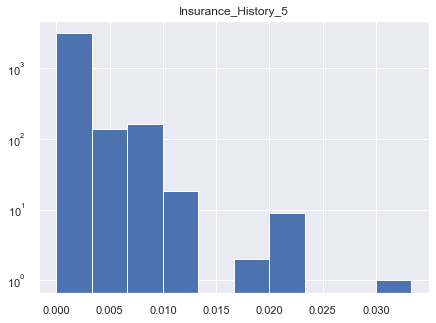

In [135]:
col = c.index[0]
y_train, y_test = distribution(df,col)

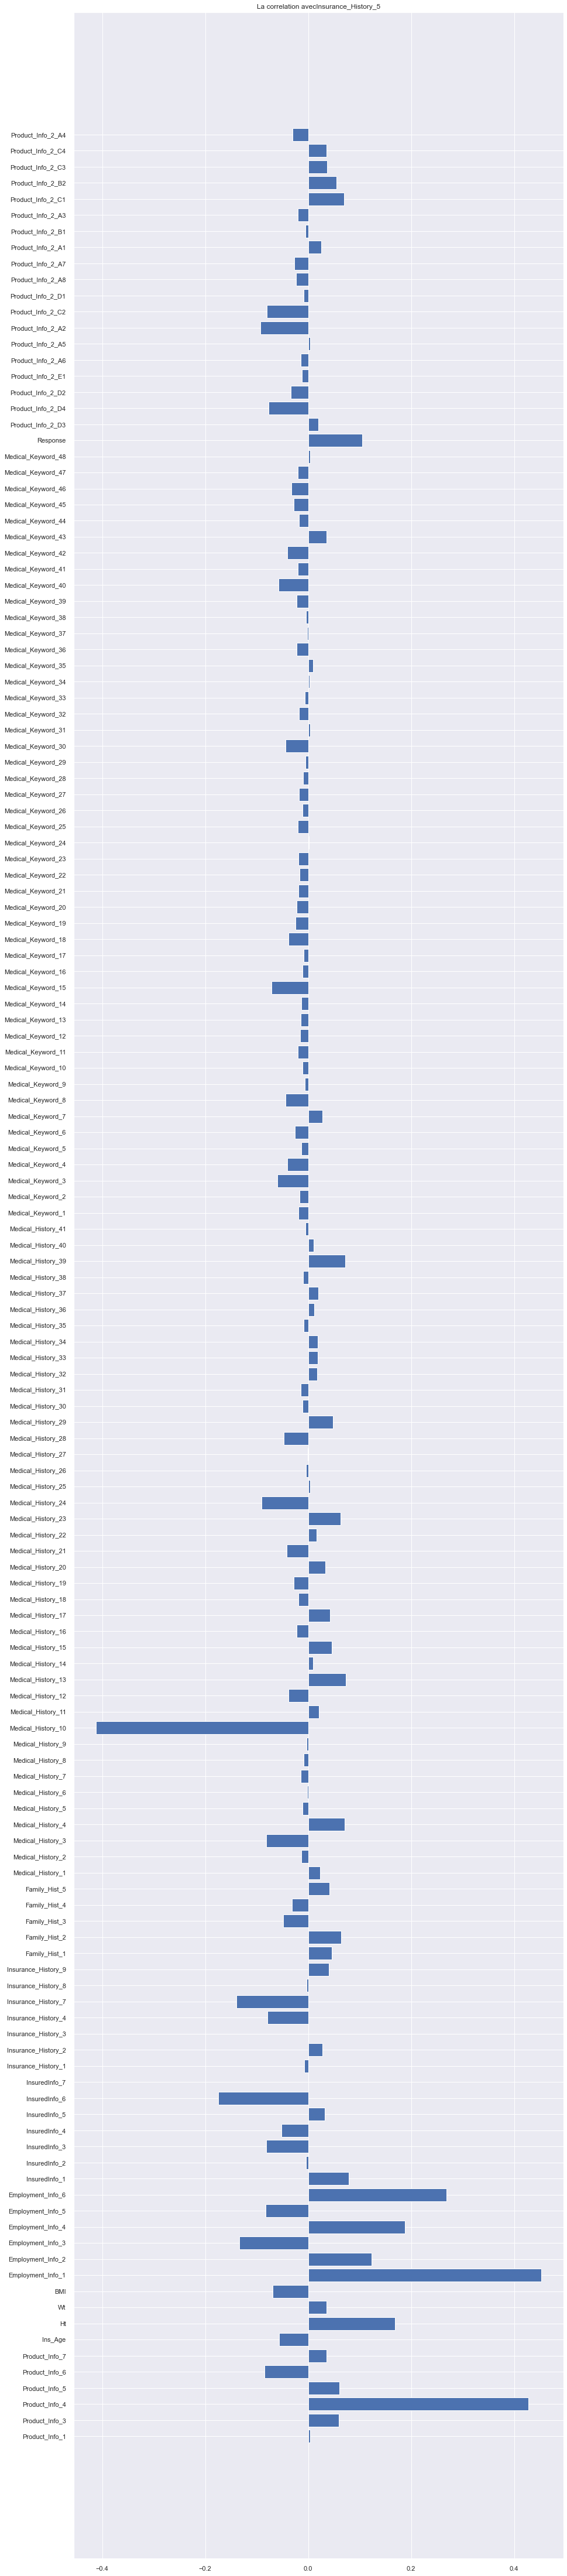

In [136]:
n_clusters = 7
y_train_mod, cor_x = correlation(df, col, n_clusters, y_train)

In [137]:
cols = Featcher(c, cor_x, 0.18)

{'Product_Info_4', 'Medical_History_10', 'Employment_Info_6', 'Employment_Info_1', 'Employment_Info_4'}
{'Product_Info_4', 'Employment_Info_4', 'Employment_Info_6', 'Employment_Info_1'}


In [138]:
Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols)
df[col]

0       4.682641e-04
1       3.318037e-03
2       1.660825e-03
3       2.666667e-03
4       3.333333e-03
5       3.333330e-04
6       1.813333e-03
7       1.660825e-03
8       1.666667e-03
9       4.682641e-04
10      6.666670e-04
11      6.666670e-04
12      3.318037e-03
13      4.682641e-04
14      4.682641e-04
15      4.433330e-04
16      4.682641e-04
17      4.682641e-04
18      4.682641e-04
19      4.682641e-04
20      3.333333e-03
21      3.333333e-03
22      3.333330e-04
23      4.682641e-04
24      4.682641e-04
25      3.333330e-04
26      4.682641e-04
27      1.333333e-03
28      1.660825e-03
29      6.666670e-04
30      6.306374e-03
31      6.666670e-04
32      3.333333e-03
33      3.333333e-03
34      4.682641e-04
35      6.666670e-04
36      3.333333e-03
37      3.318037e-03
38      1.666667e-03
39      6.306374e-03
40      4.682641e-04
41      4.682641e-04
42      4.682641e-04
43      2.000000e-03
44      1.660825e-03
45      1.333333e-03
46      6.666670e-04
47      6.666

In [139]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Family_Hist_2           2911  49.02
Family_Hist_3           3410  57.43
Family_Hist_5           4197  70.68
Medical_History_15      4423  74.49
Medical_History_24      5553  93.52
Medical_History_32      5816  97.95
Medical_History_10      5876  98.96

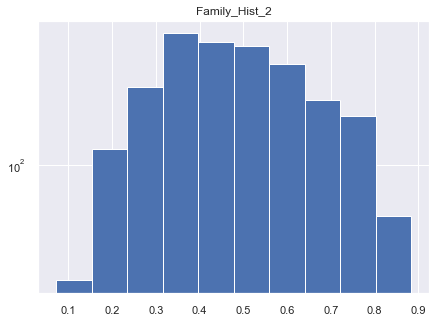

In [140]:
col = c.index[0]
y_train, y_test = distribution(df,col)

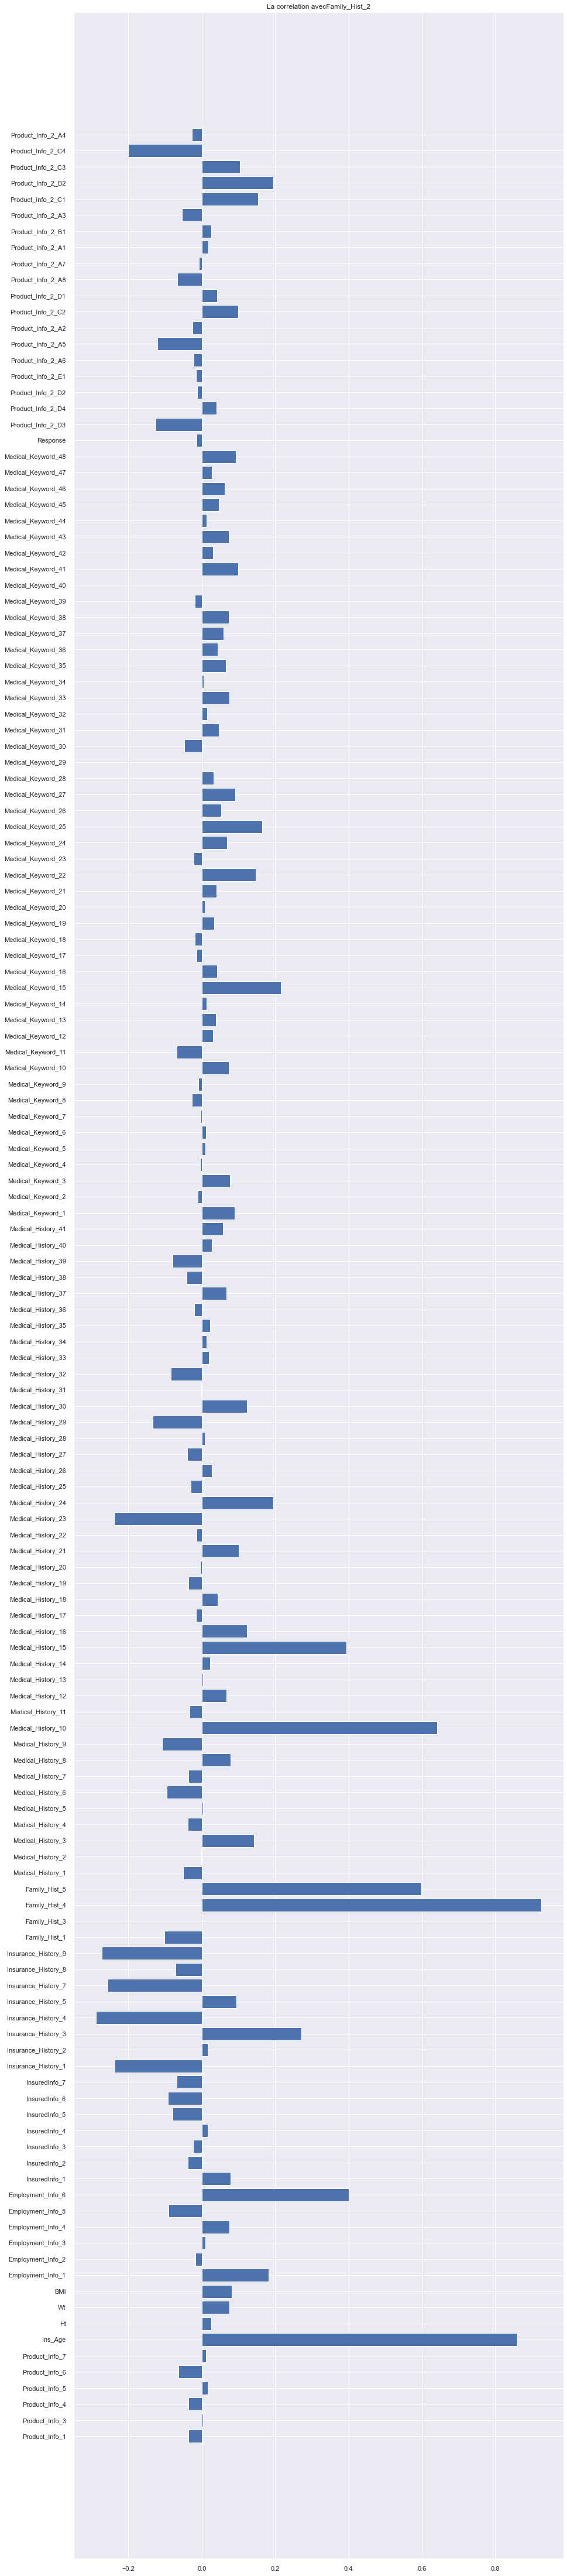

In [141]:
n_clusters = 10
y_train_mod, cor_x = correlation(df, col, n_clusters, y_train)

In [142]:
cols = Featcher(c, cor_x, 0.28)

{'Employment_Info_6', 'Medical_History_10', 'Medical_History_15', 'Insurance_History_4', 'Ins_Age', 'Family_Hist_5', 'Family_Hist_4'}
{'Insurance_History_4', 'Family_Hist_4', 'Employment_Info_6', 'Ins_Age'}


In [143]:
Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols)
df[col]

0       0.384658
1       0.608696
2       0.512752
3       0.708568
4       0.572201
5       0.434783
6       0.792882
7       0.391304
8       0.708568
9       0.449275
10      0.708568
11      0.739130
12      0.318841
13      0.304348
14      0.512752
15      0.448892
16      0.101449
17      0.434783
18      0.550725
19      0.260870
20      0.739130
21      0.792882
22      0.792882
23      0.634967
24      0.572201
25      0.565217
26      0.792882
27      0.478261
28      0.550725
29      0.739130
30      0.792882
31      0.572201
32      0.792882
33      0.811594
34      0.708568
35      0.565217
36      0.405797
37      0.384658
38      0.572201
39      0.792882
40      0.304348
41      0.708568
42      0.572201
43      0.792882
44      0.579710
45      0.708568
46      0.792882
47      0.708568
48      0.328959
49      0.579710
50      0.572201
51      0.708568
52      0.384658
53      0.811594
54      0.572201
55      0.449275
56      0.608696
57      0.724638
58      0.7085

In [144]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Family_Hist_3           3410  57.43
Family_Hist_5           4197  70.68
Medical_History_15      4423  74.49
Medical_History_24      5553  93.52
Medical_History_32      5816  97.95
Medical_History_10      5876  98.96

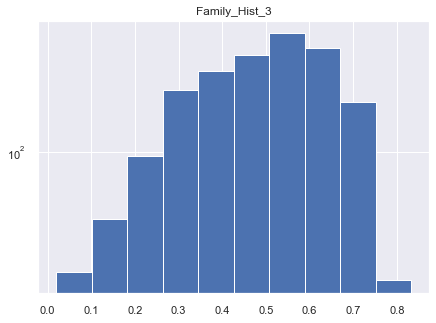

In [145]:
col = c.index[0]
y_train, y_test = distribution(df,col)

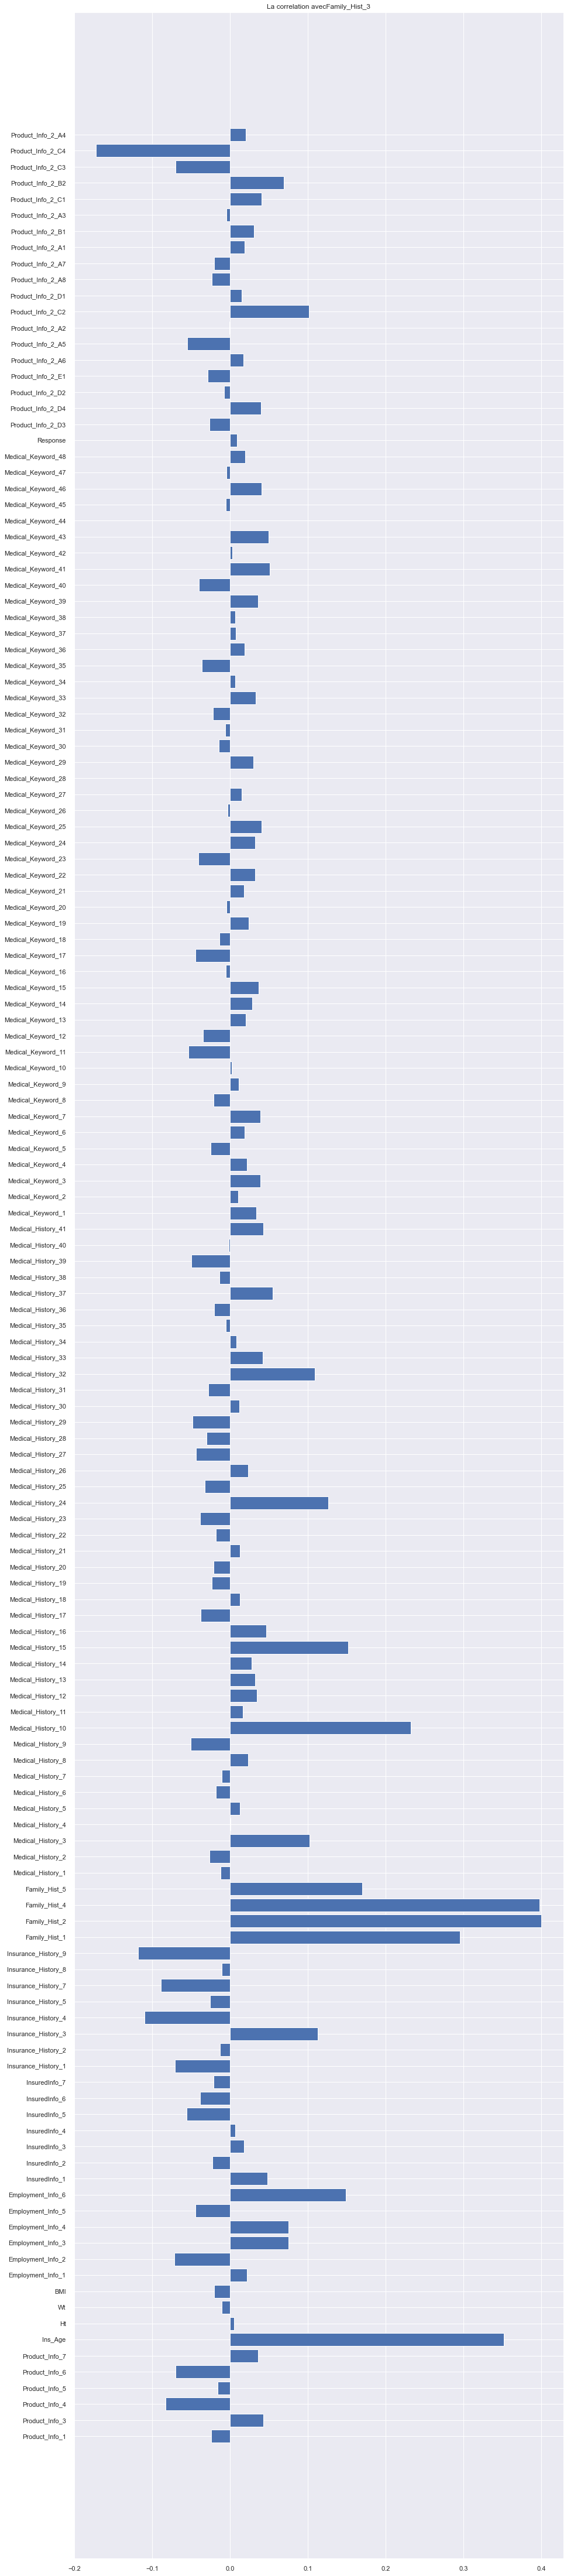

In [146]:
n_clusters = 10
y_train_mod, cor_x = correlation(df, col, n_clusters, y_train)

In [147]:
cols = Featcher(c, cor_x, 0.2)

{'Medical_History_10', 'Family_Hist_2', 'Ins_Age', 'Family_Hist_1', 'Family_Hist_4'}
{'Family_Hist_2', 'Family_Hist_4', 'Family_Hist_1', 'Ins_Age'}


In [148]:
Remplire(df, col, y_train, y_train_mod, y_test, n_clusters, cols)
df[col]

0       0.431373
1       0.398302
2       0.519608
3       0.392157
4       0.588235
5       0.668641
6       0.421569
7       0.330003
8       0.568627
9       0.457665
10      0.676471
11      0.515221
12      0.247626
13      0.330003
14      0.245098
15      0.450980
16      0.457665
17      0.398302
18      0.515221
19      0.330003
20      0.568281
21      0.509804
22      0.668641
23      0.515221
24      0.647059
25      0.398302
26      0.372549
27      0.568281
28      0.515221
29      0.398302
30      0.490196
31      0.515221
32      0.500000
33      0.515221
34      0.333333
35      0.247626
36      0.457665
37      0.398302
38      0.490196
39      0.725490
40      0.247626
41      0.668641
42      0.529412
43      0.490196
44      0.619001
45      0.568281
46      0.558824
47      0.392157
48      0.264706
49      0.568281
50      0.398302
51      0.607843
52      0.421569
53      0.247626
54      0.392157
55      0.515221
56      0.515221
57      0.668641
58      0.3039

In [149]:
c = Missing_Values(df)
c

NB_nulle  Prc %
Family_Hist_5           4197  70.68
Medical_History_15      4423  74.49
Medical_History_24      5553  93.52
Medical_History_32      5816  97.95
Medical_History_10      5876  98.96

In [150]:
df = df.drop(c.index, axis=1)
df.head()

Product_Info_1  Product_Info_3  Product_Info_4  Product_Info_5  \
0               1              26        0.487179               2   
1               1              26        0.487179               2   
2               1              26        1.000000               2   
3               1              26        0.897436               2   
4               1              26        0.282051               2   

   Product_Info_6  Product_Info_7   Ins_Age        Ht        Wt       BMI  \
0               1               1  0.253731  0.763636  0.267782  0.378752   
1               3               1  0.194030  0.763636  0.278243  0.395231   
2               1               1  0.268657  0.690909  0.282427  0.473555   
3               3               1  0.537313  0.781818  0.320084  0.443418   
4               1               1  0.432836  0.818182  0.351464  0.455603   

   ...  Product_Info_2_A8  Product_Info_2_A7  Product_Info_2_A1  \
0  ...                  0                  0                  0   
1  ...                  0                  0                  0   
2  ...                  0                  0                  0   
3  ...                  0                  0                  0   
4  ...                  0                  0                  0   

   Product_Info_2_B1  Product_Info_2_A3  Product_Info_2_C1  Product_Info_2_B2  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  1   
4                  0                  0                  0                  0   

   Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_A4  
0                  1                  0                  0  
1                  1                  0                  0  
2                  0                  1                  0  
3                  0                  0                  0  
4                  0                  0                  1  

[5 rows x 140 columns]

### 3.3 Scaling the data 

**Q:** Normalizing by the range of the data Min: MinMaxScaler

 X = (X - min(X)) / (max(X) - min(X))    range between 0 and 1

In [151]:
X_No_Normal = df.loc[:,list(df.min()!=0) or list(df.max()!=1)]
scl = MinMaxScaler()    
scl_x = scl.fit(X_No_Normal)
X_Normal = scl_x.transform(X_No_Normal)
df_Normal = pd.DataFrame(X_Normal, columns=X_No_Normal.columns)
df_Normal.head()

Product_Info_1  Product_Info_3  Product_Info_5  Product_Info_6  \
0             0.0        0.666667             0.0             0.0   
1             0.0        0.666667             0.0             1.0   
2             0.0        0.666667             0.0             0.0   
3             0.0        0.666667             0.0             1.0   
4             0.0        0.666667             0.0             0.0   

   Product_Info_7        Ht        Wt       BMI  Employment_Info_2  \
0             0.0  0.645161  0.213483  0.339914           0.222222   
1             0.0  0.645161  0.224719  0.357423           0.222222   
2             0.0  0.516129  0.229213  0.440644           0.222222   
3             0.0  0.677419  0.269663  0.408623           0.222222   
4             0.0  0.741935  0.303371  0.421570           0.361111   

   Employment_Info_3  ...  Medical_History_31  Medical_History_33  \
0                0.0  ...                 1.0                 1.0   
1                0.0  ...                 1.0                 1.0   
2                0.0  ...                 1.0                 1.0   
3                0.0  ...                 1.0                 1.0   
4                0.0  ...                 1.0                 1.0   

   Medical_History_34  Medical_History_35  Medical_History_36  \
0                 1.0                 0.0                 0.5   
1                 1.0                 0.0                 0.5   
2                 1.0                 0.0                 0.5   
3                 1.0                 0.0                 0.5   
4                 1.0                 0.0                 1.0   

   Medical_History_37  Medical_History_38  Medical_History_39  \
0                 1.0                 0.0                 1.0   
1                 1.0                 0.0                 1.0   
2                 1.0                 0.0                 1.0   
3                 1.0                 0.0                 1.0   
4                 1.0                 0.0                 1.0   

   Medical_History_40  Medical_History_41  
0                 1.0                 0.0  
1                 1.0                 0.0  
2                 1.0                 0.0  
3                 1.0                 1.0  
4                 1.0                 0.0  

[5 rows x 65 columns]

In [152]:
_ = df.drop(X_No_Normal.columns, axis=1)
df_scaled_minmax = pd.concat([df_Normal, _ ], axis=1)
df_scaled_minmax.head()

Product_Info_1  Product_Info_3  Product_Info_5  Product_Info_6  \
0             0.0        0.666667             0.0             0.0   
1             0.0        0.666667             0.0             1.0   
2             0.0        0.666667             0.0             0.0   
3             0.0        0.666667             0.0             1.0   
4             0.0        0.666667             0.0             0.0   

   Product_Info_7        Ht        Wt       BMI  Employment_Info_2  \
0             0.0  0.645161  0.213483  0.339914           0.222222   
1             0.0  0.645161  0.224719  0.357423           0.222222   
2             0.0  0.516129  0.229213  0.440644           0.222222   
3             0.0  0.677419  0.269663  0.408623           0.222222   
4             0.0  0.741935  0.303371  0.421570           0.361111   

   Employment_Info_3  ...  Product_Info_2_A8  Product_Info_2_A7  \
0                0.0  ...                  0                  0   
1                0.0  ...                  0                  0   
2                0.0  ...                  0                  0   
3                0.0  ...                  0                  0   
4                0.0  ...                  0                  0   

   Product_Info_2_A1  Product_Info_2_B1  Product_Info_2_A3  Product_Info_2_C1  \
0                  0                  0                  0                  0   
1                  0                  0                  0                  0   
2                  0                  0                  0                  0   
3                  0                  0                  0                  0   
4                  0                  0                  0                  0   

   Product_Info_2_B2  Product_Info_2_C3  Product_Info_2_C4  Product_Info_2_A4  
0                  0                  1                  0                  0  
1                  0                  1                  0                  0  
2                  0                  0                  1                  0  
3                  1                  0                  0                  0  
4                  0                  0                  0                  1  

[5 rows x 140 columns]

In [153]:
df_scaled_minmax.to_excel("df_Preparer.xlsx")

### 3.4 Splitting the Dataset into Training set and Test Set

**Q:** Splitting the dataset between X and y

In [154]:
y = df_scaled_minmax["Response"]
X = df_scaled_minmax.drop(["Response"],axis=1)

**Q:** Split the data between train 80%  and test 20% in stratified manner (X_train, X_test, y_train, y_test)

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

### 3.2  Sampling and co-variance shift

**Q:** Check that there isn't a co-variance shift between the train and the test.

Run a model to check if we can make a difference between the train and test

In [156]:
train_sample = X_train.copy()
train_sample['Target'] = 1
test_sample = X_test.copy()
test_sample['Target'] = 0
cov_shift = pd.concat([train_sample,test_sample], axis=0,ignore_index=True)
y_shift = cov_shift['Target']
x_shift = cov_shift.drop('Target',axis=1)

In [157]:
clf =  RandomForestClassifier(n_estimators=150, max_depth=2)
predictions = np.zeros(y_shift.shape)

cv = StratifiedKFold(n_splits=20 , random_state=0 , shuffle=True) 

for train_index, test_index in cv.split(x_shift, y_shift):
    x_shift_train = x_shift.loc[train_index]
    y_shift_train = y_shift[train_index]
    
    x_shift_test = x_shift.loc[test_index]
    
    clf.fit(x_shift_train,y_shift_train)
    
    probs = clf.predict_proba(x_shift_test)[:, 1]
    predictions[test_index] = probs
    
print('ROC-AUC :', roc_auc_score(y_shift, predictions))

ROC-AUC : 0.5153506999822789


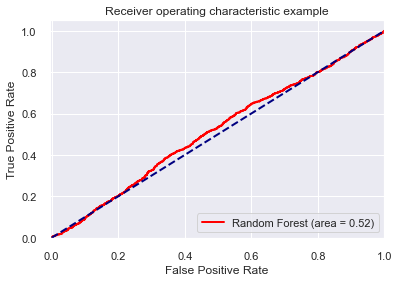

In [158]:
DTfpr, DTtpr, _ = roc_curve(y_shift, predictions)
DTroc_auc = auc(DTfpr, DTtpr)
lw = 2
plt.plot(DTfpr, DTtpr, color='red',
         lw=lw, label='Random Forest (area = %0.2f)' % DTroc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.006, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 4. Model Baseline

## Plan:
- Analyse de la base de donnée préparée:Matrice de confusion du modèle DummyClassifier
- Feature Selection
- Cross-Validation et choix du modèle
- Choix des Hyperparamètres: GridSearch
- Evaluation du modèle choisi

**Matrix Confusion**

Accuracy = 0.60
F1 = 0.73
Precision = 0.73
Recall = 0.73
log-loss = 13.75
ROC-AUC = 0.48


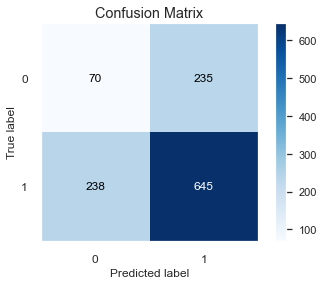

In [159]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train)
dummy_pred=dummy_clf.predict(X_test)
skplt.metrics.plot_confusion_matrix(y_test, dummy_pred)

acc = metrics.accuracy_score(y_test, dummy_pred)
print("Accuracy = %.2f" %(acc))
f1=metrics.f1_score(y_test,dummy_pred)
print("F1 = %.2f" %(f1))
p=metrics.precision_score(y_test,dummy_pred)
print("Precision = %.2f" %(p))
r=metrics.recall_score(y_test,dummy_pred)
print("Recall = %.2f" %(r))
loss=metrics.log_loss(y_test,dummy_pred)
print("log-loss = %.2f" %(loss))
auc=metrics.roc_auc_score(y_test,dummy_pred)
print("ROC-AUC = %.2f" %(auc))

In [160]:
len(X_train.columns)

139

In [161]:
len(X_test.columns)

139

In [162]:
X_train.head()

Product_Info_1  Product_Info_3  Product_Info_5  Product_Info_6  \
2648             0.0        0.666667             0.0             1.0   
295              0.0        0.666667             0.0             1.0   
3407             0.0        0.181818             0.0             1.0   
2381             0.0        0.666667             0.0             1.0   
5915             0.0        0.666667             0.0             1.0   

      Product_Info_7        Ht        Wt       BMI  Employment_Info_2  \
2648             0.0  0.322581  0.157303  0.432494           0.222222   
295              0.0  0.580645  0.276404  0.478741           0.222222   
3407             0.0  0.548387  0.123596  0.240897           0.055556   
2381             0.0  0.645161  0.292135  0.462477           0.305556   
5915             0.0  0.741935  0.235955  0.324861           0.222222   

      Employment_Info_3  ...  Product_Info_2_A8  Product_Info_2_A7  \
2648                0.0  ...                  0                  0   
295                 0.0  ...                  0                  0   
3407                0.0  ...                  0                  0   
2381                0.0  ...                  0                  0   
5915                0.0  ...                  0                  0   

      Product_Info_2_A1  Product_Info_2_B1  Product_Info_2_A3  \
2648                  0                  0                  0   
295                   0                  0                  0   
3407                  0                  0                  0   
2381                  0                  0                  0   
5915                  0                  0                  0   

      Product_Info_2_C1  Product_Info_2_B2  Product_Info_2_C3  \
2648                  0                  0                  0   
295                   1                  0                  0   
3407                  0                  0                  0   
2381                  0                  0                  1   
5915                  0                  0                  0   

      Product_Info_2_C4  Product_Info_2_A4  
2648                  0                  0  
295                   0                  0  
3407                  0                  1  
2381                  0                  0  
5915                  0                  0  

[5 rows x 139 columns]

In [163]:
X_test.head()

Product_Info_1  Product_Info_3  Product_Info_5  Product_Info_6  \
3176             1.0        0.666667             0.0             1.0   
5463             0.0        0.666667             0.0             0.0   
2909             0.0        0.666667             0.0             1.0   
3601             0.0        0.666667             0.0             1.0   
1771             0.0        0.666667             0.0             0.0   

      Product_Info_7        Ht        Wt       BMI  Employment_Info_2  \
3176             0.0  0.612903  0.224719  0.375057           0.222222   
5463             1.0  0.645161  0.287640  0.455473           0.222222   
2909             0.0  0.580645  0.303371  0.523234           0.305556   
3601             0.0  0.483871  0.224719  0.453791           0.222222   
1771             0.0  0.548387  0.258427  0.469952           0.305556   

      Employment_Info_3  ...  Product_Info_2_A8  Product_Info_2_A7  \
3176                0.0  ...                  0                  0   
5463                0.0  ...                  0                  0   
2909                0.0  ...                  0                  0   
3601                0.0  ...                  0                  0   
1771                0.0  ...                  0                  1   

      Product_Info_2_A1  Product_Info_2_B1  Product_Info_2_A3  \
3176                  0                  0                  0   
5463                  0                  0                  0   
2909                  0                  0                  0   
3601                  0                  0                  0   
1771                  0                  0                  0   

      Product_Info_2_C1  Product_Info_2_B2  Product_Info_2_C3  \
3176                  0                  0                  0   
5463                  0                  0                  1   
2909                  1                  0                  0   
3601                  0                  0                  1   
1771                  0                  0                  0   

      Product_Info_2_C4  Product_Info_2_A4  
3176                  1                  0  
5463                  0                  0  
2909                  0                  0  
3601                  0                  0  
1771                  0                  0  

[5 rows x 139 columns]

## 4.1. Feature selection

We've come up to more than 130 features so far. This number is quite large. 

When feature engineering is done, we usually tend to decrease the dimensionality by selecting the "right" number of features that capture the essential.

In fact, feature selection comes with many benefits:

- It decreases redundancy among the data
- It speeds up the training process
- It reduces overfitting

Tree-based estimators can be used to compute feature importances, which in turn can be used to discard irrelevant features.

**Method 1**

In [164]:
clf = RandomForestClassifier(n_estimators=50, max_features='sqrt')
clf = clf.fit(X_train, y_train)

Recovering the train set and the test set from the combined dataset is an easy task.

In [165]:
features = pd.DataFrame()
features['feature'] = X_train.columns
features['importance'] = clf.feature_importances_
features.sort_values(by=['importance'], ascending=True, inplace=True)
features.set_index('feature', inplace=True)

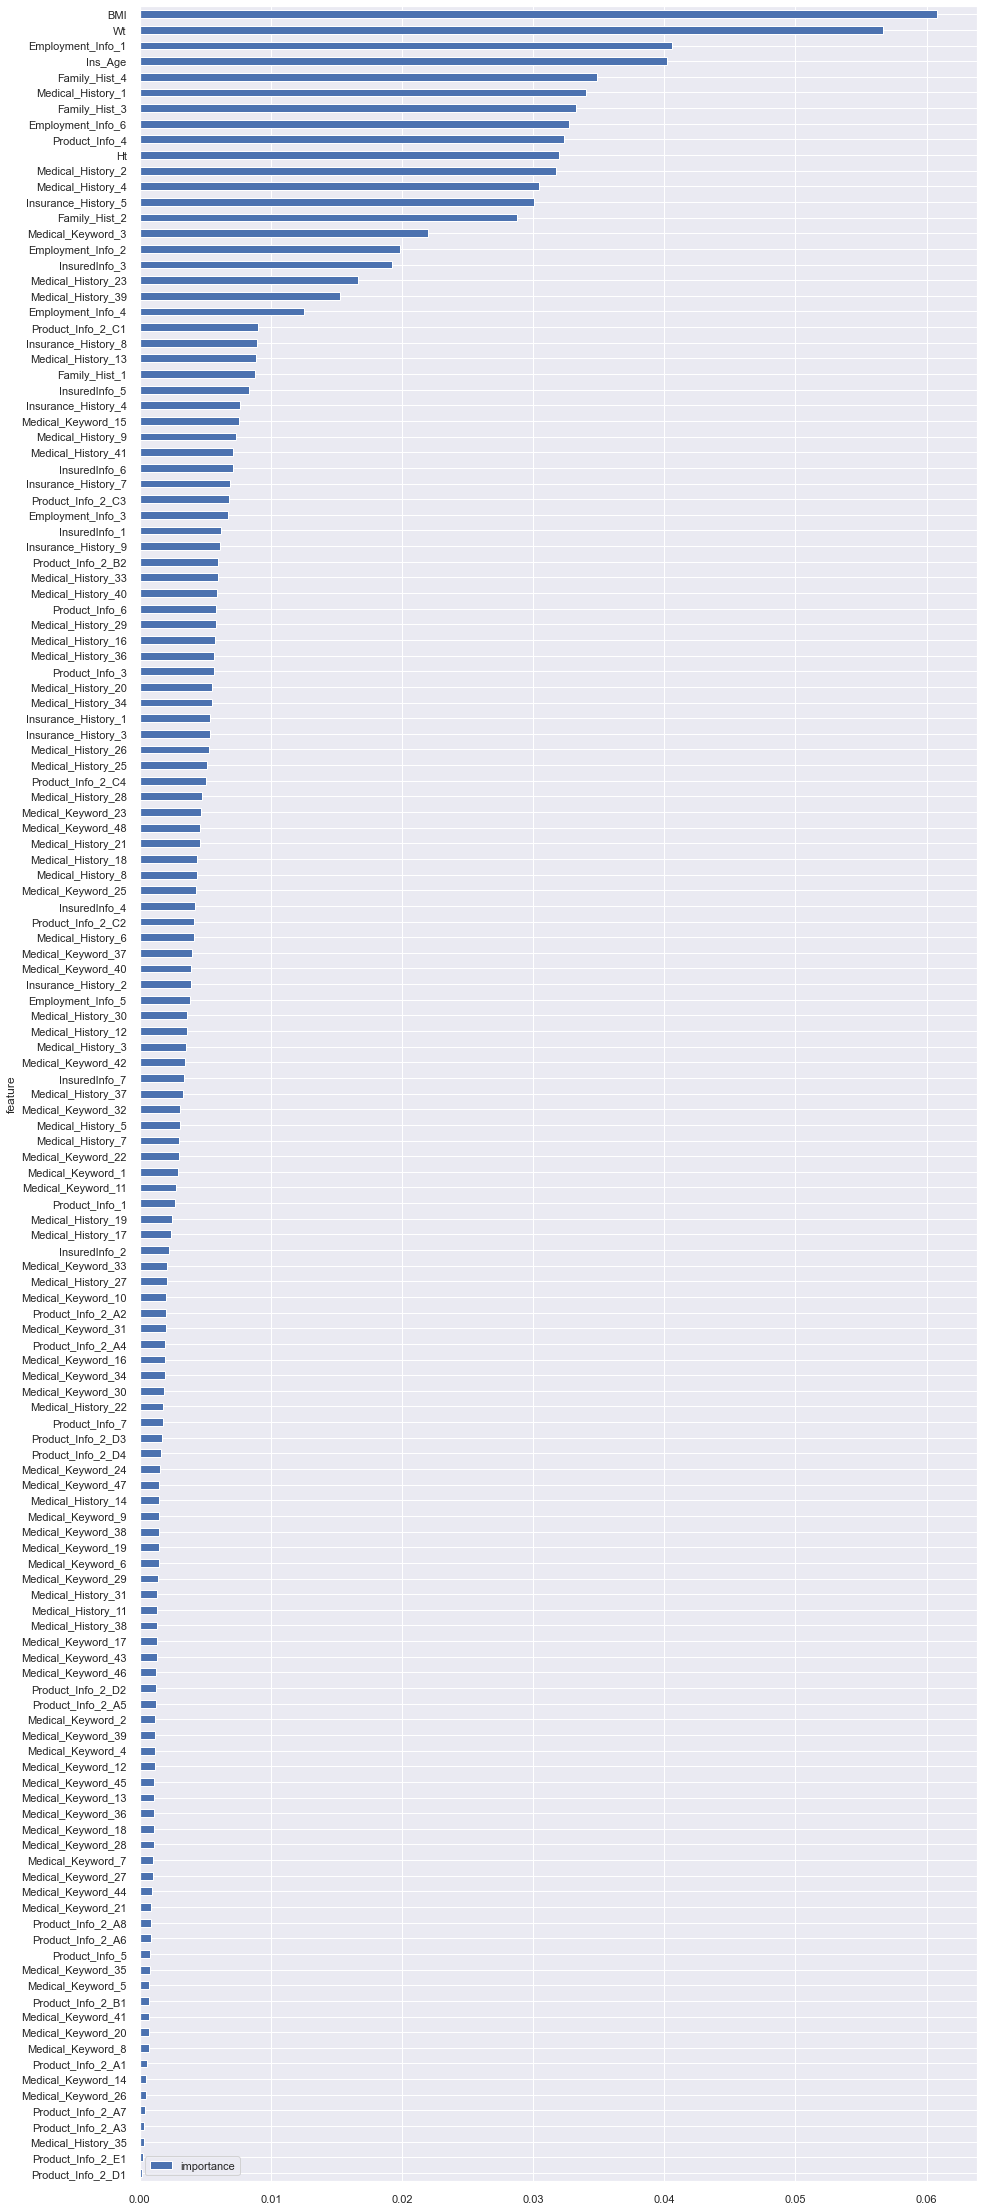

In [166]:
features.plot(kind='barh', figsize=(15, 40))

**As you may notice, there is a great importance linked to BMI, Wt, Ins_Age and Employment_Info1.**

**Method 1***

In [172]:
X_train.columns

Index(['Product_Info_1', 'Product_Info_3', 'Product_Info_5', 'Product_Info_6',
       'Product_Info_7', 'Ht', 'Wt', 'BMI', 'Employment_Info_2',
       'Employment_Info_3',
       ...
       'Product_Info_2_A8', 'Product_Info_2_A7', 'Product_Info_2_A1',
       'Product_Info_2_B1', 'Product_Info_2_A3', 'Product_Info_2_C1',
       'Product_Info_2_B2', 'Product_Info_2_C3', 'Product_Info_2_C4',
       'Product_Info_2_A4'],
      dtype='object', length=139)

In [201]:
#X_train_ = X_train.drop(['Insurance_History_4','Insurance_History_7','Medical_History_25'], axis=1)

In [202]:
#clf_ = RandomForestClassifier(n_estimators=50, max_features='sqrt')
#clf_ = clf_.fit(X_train_, y_train)

In [204]:
#features_ = pd.DataFrame()
#features_['feature'] = X_train_.columns
#features_['importance'] = clf.feature_importances_
#features_.sort_values(by=['importance'], ascending=True, inplace=True)
#features_.set_index('feature', inplace=True)

## 4.2 Cross Validation (StratifiedKFold)

**Scoring Function**

To evaluate our model we'll be using a 5-fold cross validation with the accuracy since it's the metric that the competition uses in the leaderboard.

To do that, we'll define a small scoring function. 

In [181]:
def compute_score(clf, X, y, scoring='roc_auc'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [182]:
k_fold = StratifiedKFold(n_splits=20, shuffle=True, random_state=0)

## 4.3. Let's try different base models

In [183]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()
knn = KNeighborsClassifier(n_neighbors = 17)
dtc = DecisionTreeClassifier()
gnb = GaussianNB()
svm = SVC()

models = [logreg, logreg_cv, rf, gboost, knn, dtc, gnb, svm]

In [184]:
for model in models:
    print ('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=X_train, y=y_train, scoring='roc_auc')
    print ('CV ROC-AUC = {0}'.format(score))
    print ('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV ROC-AUC = 0.7694595187918768
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV ROC-AUC = 0.7731560578223443
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV ROC-AUC = 0.7809321833822825
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV ROC-AUC = 0.7825997617077283
****
Cross-validation of : <class 'sklearn.neighbors._classification.KNeighborsClassifier'>
CV ROC-AUC = 0.6514471014659314
****
Cross-validation of : <class 'sklearn.tree._classes.DecisionTreeClassifier'>
CV ROC-AUC = 0.6154472770789958
****
Cross-validation of : <class 'sklearn.naive_bayes.GaussianNB'>
CV ROC-AUC = 0.7178926917833433
****
Cross-validation of : <class 'sklearn.svm._classes.SVC'>
CV ROC-AUC = 0.752776510558441
****


## 4.4. Hyperparameter Tuning

We will use grid search to identify the optimal parameters of our random forest model. Because our training dataset is quite small, we can get away with testing a wider range of hyperparameter values. When I ran this on my 8 GB Windows machine, the process took less than ten minutes. I will not run it here for the sake of saving myself time, but I will discuss the results of this grid search.

In [178]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [180]:
# turn run_gs to True if you want to run the gridsearch again.
run_gs = True

if run_gs:
    parameter_grid = {
                 'criterion'   : ["gini", "entropy"],
                 'max_depth' : [4, 6, 8],
                 'n_estimators': [50, 100],
                 'max_features': ['sqrt', 'auto', 'log2'],
                 'min_samples_split': [2, 4, 10],
                 'min_samples_leaf': [1, 5, 10],
                 'bootstrap': [True, False],
                 }
    forest = RandomForestClassifier()
    cross_validation = StratifiedKFold(n_splits=3)
    print(1)
    grid_search = GridSearchCV(forest,
                               scoring='roc_auc',
                               param_grid=parameter_grid,
                               cv=cross_validation,
                               verbose=1
                              )

    grid_search.fit(X_train, y_train)
    model = grid_search
    parameters = grid_search.best_params_

    print('Best ROC-AUC: {}'.format(grid_search.best_score_))
    print('Best parameters: {}'.format(grid_search.best_params_))
    
else: 
    parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
                  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
    
    model = RandomForestClassifier(**parameters)
    model.fit(X_train, y_train)

1
Fitting 3 folds for each of 648 candidates, totalling 1944 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1944 out of 1944 | elapsed:  8.9min finished


Best ROC-AUC: 0.7851694991101094
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}


# 5. Model Estimation and Evaluation

We are now ready to fit our model using the optimal hyperparameters. The out-of-bag score can give us an unbiased estimate of the model: ROC-AUC: 0.78.

Looking at the results of the grid search:  

Best ROC-AUC: 0.7851694991101094
Best parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 4, 'n_estimators': 50}

In [185]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=50,
                             min_samples_split=4,
                             min_samples_leaf=5,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
rf.fit(X_train, y_train)
print("%.4f" % rf.oob_score_)

0.7844


In [208]:
Test_predict=rf.predict(X_test)
Test_predict

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [210]:
roc_auc_score(Test_predict,y_test)

0.8973167515946263

Let's take a brief look at our variable importance according to our random forest model.

In [186]:
pd.concat((pd.DataFrame(X_train.columns, columns = ['variable']), 
           pd.DataFrame(rf.feature_importances_, columns = ['importance'])), 
          axis = 1).sort_values(by='importance', ascending = False)[:20]

variable  importance
6                    Wt    0.078277
7                   BMI    0.076751
31    Medical_History_4    0.050942
66              Ins_Age    0.041463
74    Medical_Keyword_3    0.040882
65       Product_Info_4    0.040147
67    Employment_Info_1    0.036877
71    Medical_History_1    0.036228
28        Family_Hist_4    0.036204
69    Employment_Info_6    0.034175
29    Medical_History_2    0.032723
5                    Ht    0.030931
26        Family_Hist_2    0.030779
27        Family_Hist_3    0.029892
62   Medical_History_39    0.029600
70  Insurance_History_5    0.028627
48   Medical_History_23    0.028116
8     Employment_Info_2    0.017743
13        InsuredInfo_3    0.016371
39   Medical_History_13    0.014806